# Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## План выполнения работ
### [Часть 1. Приоритизация гипотез.](#step1)
- ##### [Шаг 1. Откройте файл с данными и изучите общую информацию ](#step2)
- ##### [Шаг 2. Приоритизации гипотез](#step3)

### [Часть 2. Анализ A/B-теста](#step4)
- ##### [Шаг 1. Откройте файл с данными и изучите общую информацию ](#step5)
- ##### [Шаг 2. Анализ A/B-теста](#step6)

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sns
import scipy.stats as stats
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

## <a id="step1"> Часть 1. Приоритизация гипотез. </a>

### <a id="step2">Шаг 1. Откройте файл с данными и изучите общую информацию </a>

### Рассмотрим полученные данные hypothesis.csv 

In [2]:
#hypothesis = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum7/hypothesis.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')


In [3]:
print('\nРассмотрим общую информацию')
hypothesis.info()
print('\nВыведем DataFrame на экран')
display(hypothesis)
print('\nРассмотрим описательную статистику нашего DataFrame')
hypothesis.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Выведем DataFrame на экран


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



Рассмотрим описательную статистику нашего DataFrame


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


##### Описание  данных

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### <a id="step3">Шаг 2. Приоритизации гипотез </a>


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [5]:
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = hypothesis['ICE'] * hypothesis['Reach']

In [7]:
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Как мы видим, параметр Reach изменил приоритетность наших гипотез. Reach учитывает количество пользователей, на которых повлияют изменения.  Наиболее перспективными при двух способах приоритизации задачи являются гипотезы: 0 и 7. При учете не только силы, но и охвата пользоватей наиболее важными для проверки гипотезами являются: 7, 3 и 0. 

## <a id="step4"> Часть 2. Анализ A/B-теста </a>

### <a id="step5">Шаг 1. Откройте файл с данными и изучите общую информацию </a>

In [8]:
#orders = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum7/orders.csv')
orders = pd.read_csv('/datasets/orders.csv')
#visitors = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum7/visitors.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
print('\nРассмотрим общую информацию')
orders.info()
print('\nВыведем 10 строк DataFrame на экран')
display(orders.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
orders.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Выведем 10 строк DataFrame на экран


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B



Рассмотрим описательную статистику нашего DataFrame


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


##### Описание  данных orders

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

In [10]:
print('\nРассмотрим общую информацию')
visitors.info()
print('\nВыведем 10 строк DataFrame на экран')
display(visitors.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
visitors.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Выведем 10 строк DataFrame на экран


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406



Рассмотрим описательную статистику нашего DataFrame


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


##### Описание данных orders

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

#### Приведем дату к формату даты

In [11]:
orders['date'] =  pd.to_datetime(orders['date'],format = '%Y-%m-%d')
visitors['date'] =  pd.to_datetime(visitors['date'],format = '%Y-%m-%d')

### <a id="step6">Шаг 2. Анализ A/B-теста </a>

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [12]:
# Создадим массив уникальных пар значений дат и групп теста 
datesGroups = orders[['date','group']].drop_duplicates()

In [13]:
# Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<= x['date'],orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique\
                                           , 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [14]:
# Соберем агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [15]:
# Объединим таблицы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


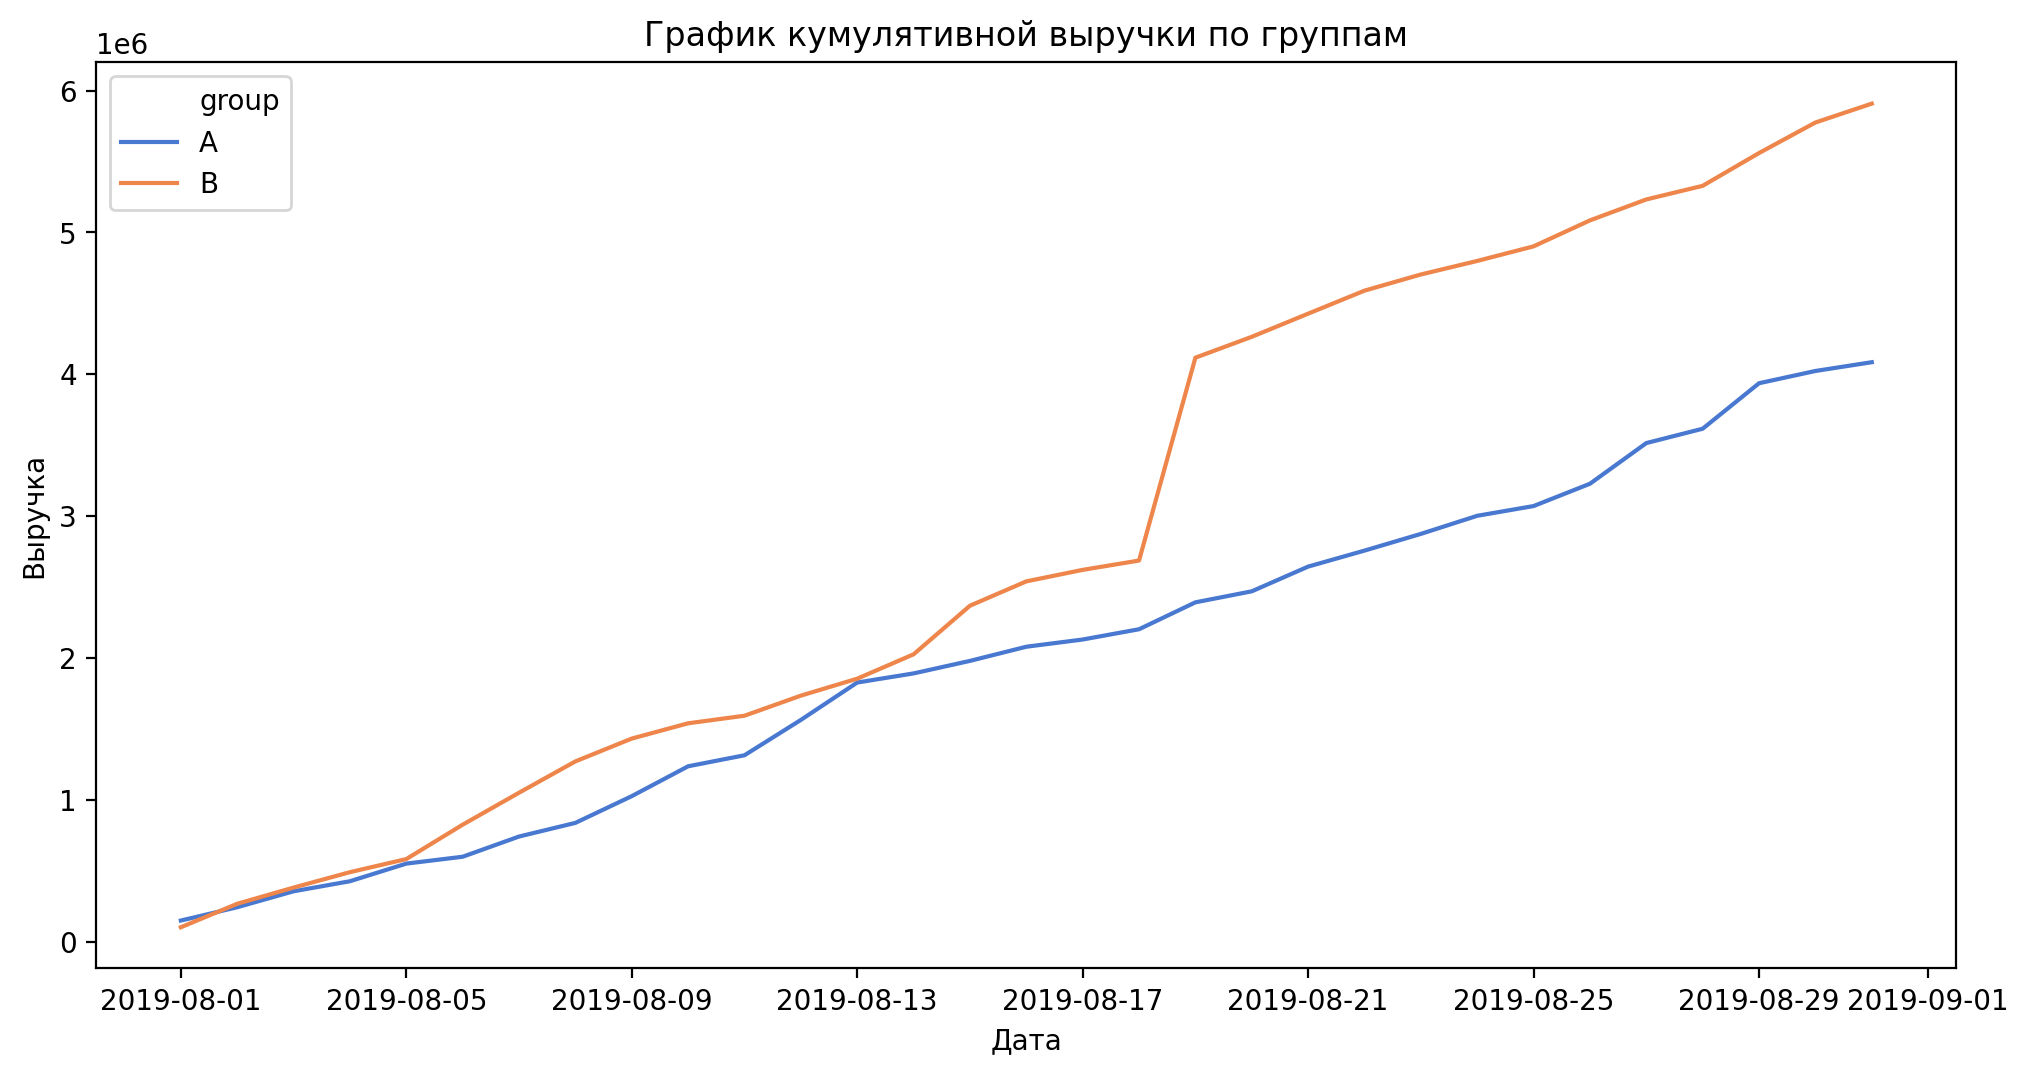

In [16]:
# Построим график кумулятивной выручки по группам
plt.figure(figsize=(12, 6), dpi=200)
g = sns.lineplot(x="date", y="revenue",
             hue="group", palette="muted", data=cumulativeData)
g.set(title='График кумулятивной выручки по группам')
g.set(xlabel='Дата', ylabel='Выручка');

#### Вывод
Выручка увеличивается на протяжении всего теста. Это хорошие новости.

На протяжении всего теста группа B лидирует. Резкий скачок у группы B в середине теста может означать аномальные заказы. 

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

In [17]:
cumulativeData['average'] = cumulativeData['revenue'] / cumulativeData['orders']
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors,average
0,2019-08-01,A,24,20,148579,719,6190.791667
1,2019-08-01,B,21,20,101217,713,4819.857143
2,2019-08-02,A,44,38,242401,1338,5509.113636
3,2019-08-02,B,45,43,266748,1294,5927.733333
4,2019-08-03,A,68,62,354874,1845,5218.735294
5,2019-08-03,B,61,59,380996,1803,6245.836066
6,2019-08-04,A,84,77,425699,2562,5067.845238
7,2019-08-04,B,78,75,489567,2573,6276.500000
8,2019-08-05,A,109,100,549917,3318,5045.110092
9,2019-08-05,B,101,98,581995,3280,5762.326733


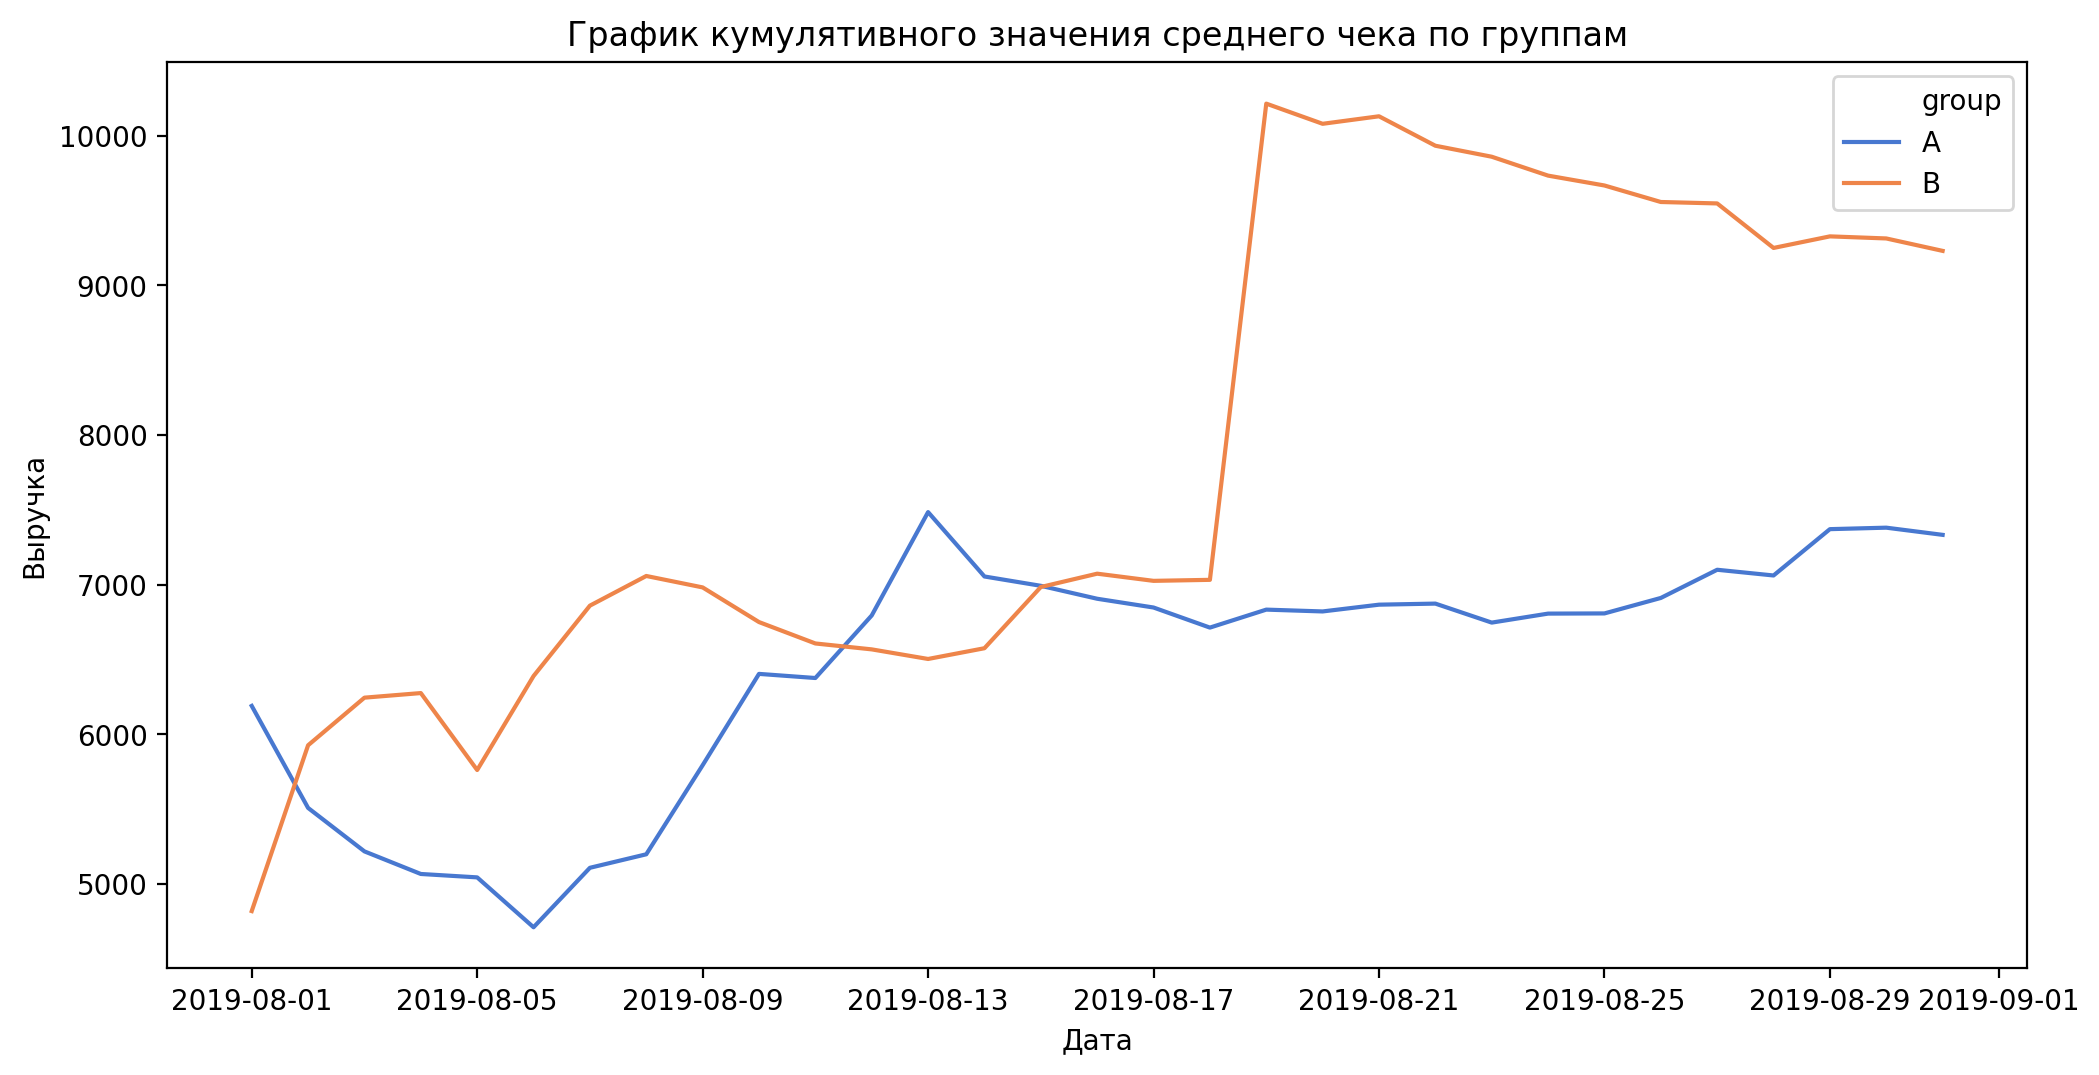

In [18]:
plt.figure(figsize=(12, 6), dpi=200)

g = sns.lineplot(x="date", y="average",
             hue="group", palette="muted", data=cumulativeData)
g.set(title='График кумулятивного значения среднего чека по группам')
g.set(xlabel='Дата', ylabel='Выручка');

#### Вывод
Кумулятивное значение среднего чека по группам имеет явные скачки. Вероятнее всего в наш тест попали большие заказы. Требуется анализ выбросов.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [19]:
# Выделим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [20]:
# Cоберем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

Text(0, 0.5, 'Отношение средних чеков')

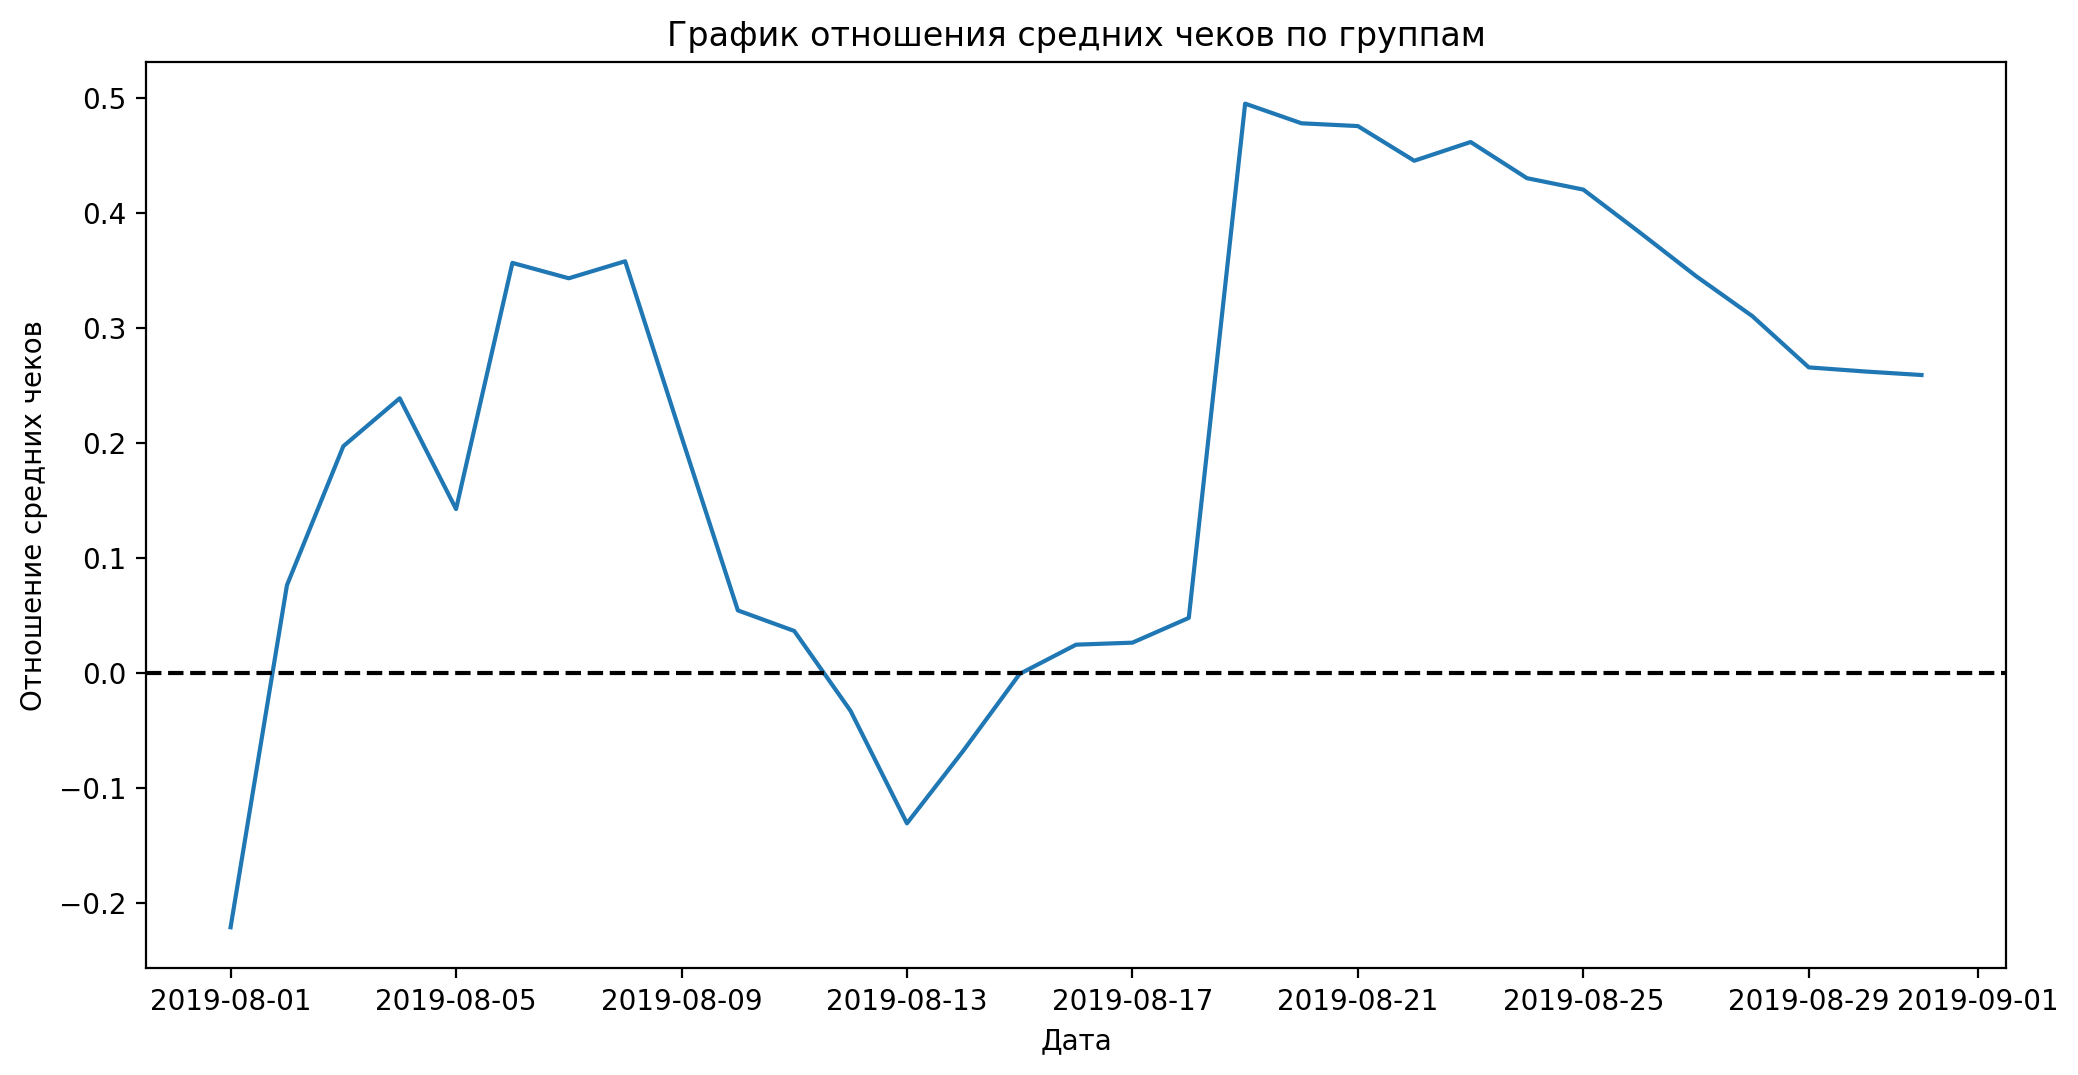

In [21]:
# Построим отношение средних чеков
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График отношения средних чеков по группам')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')

#### Вывод
График различия между сегментами имеет резкие скачки, что свидетельствует о крупных заказах и выбросах

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

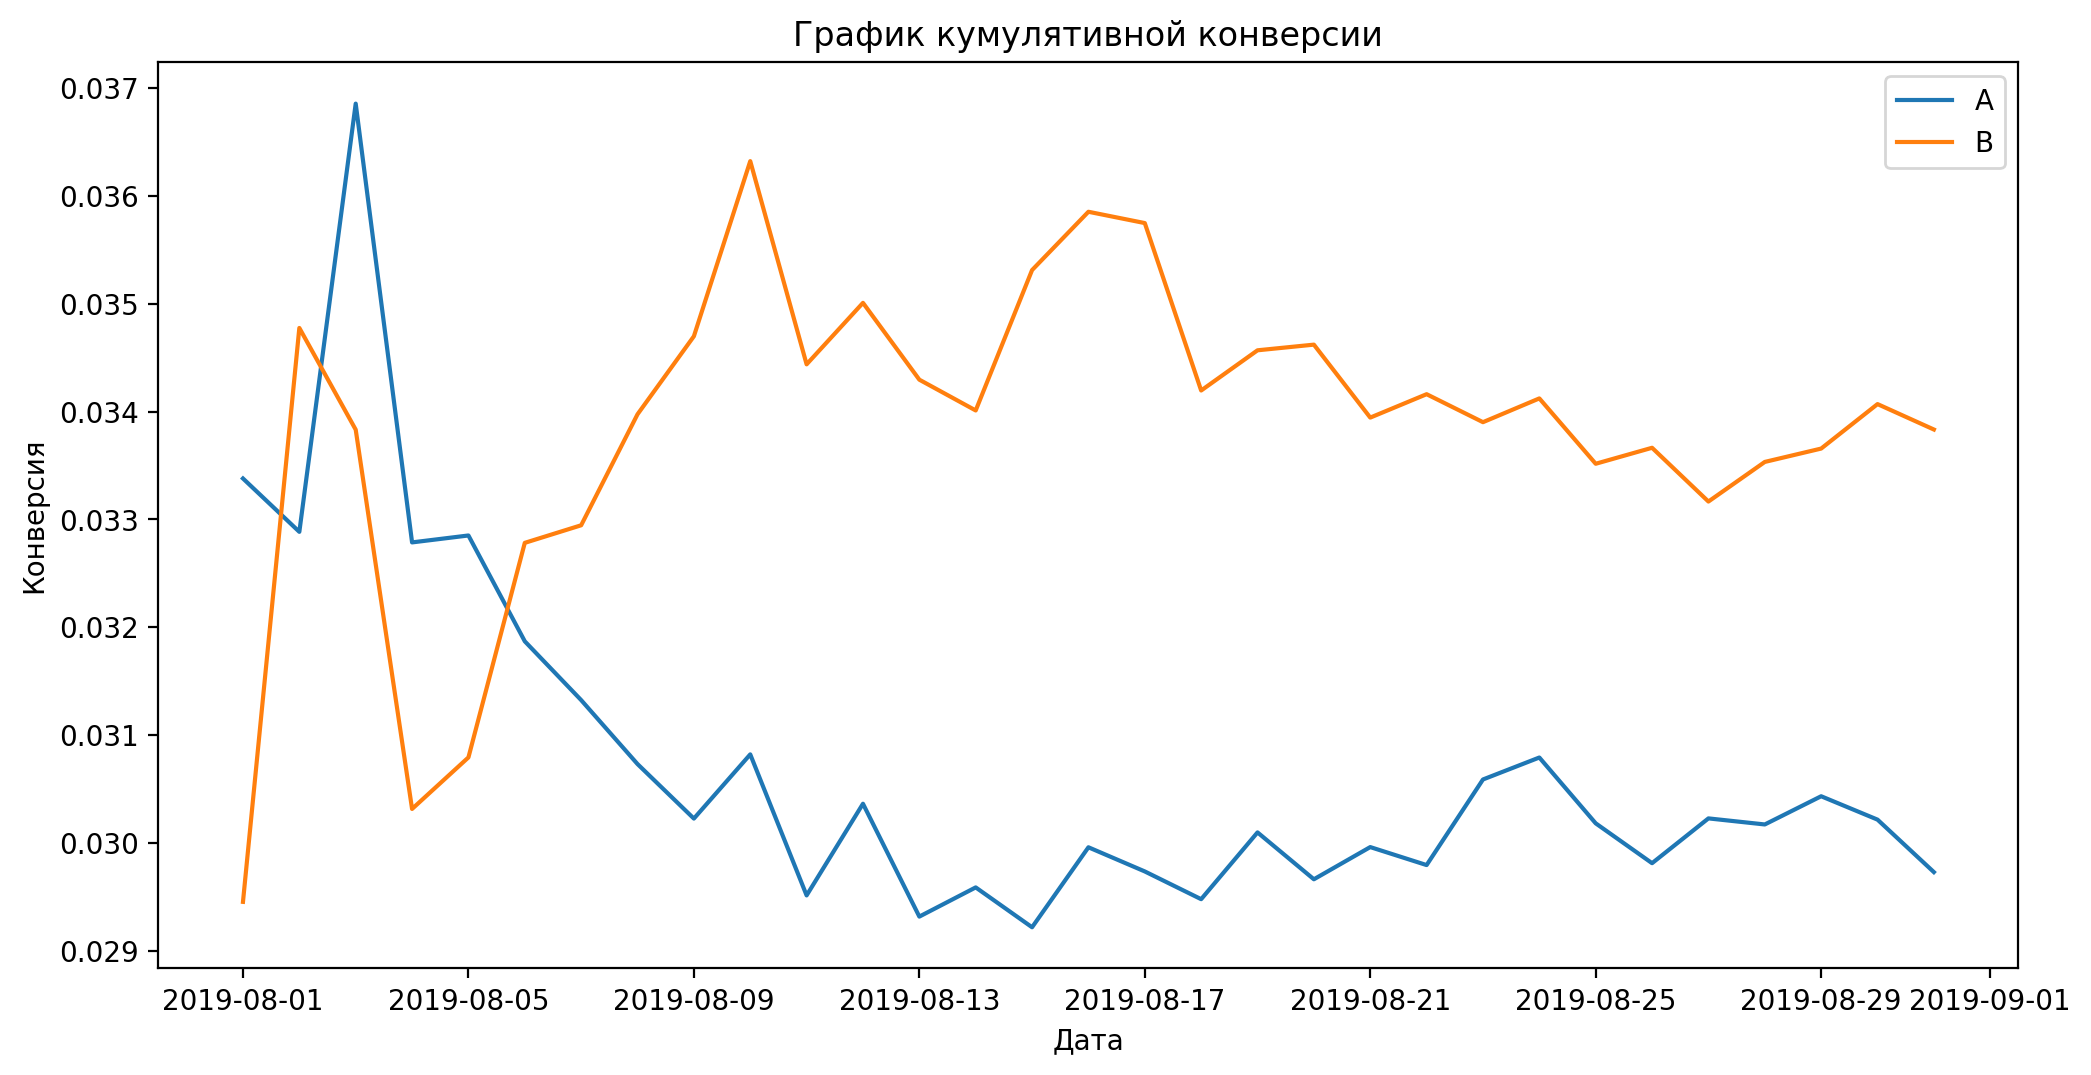

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

plt.legend()


#### Вывод
Видим, что конверсия группы B сначала была ниже, но потом вырвалась вперед и зафиксировалась.

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

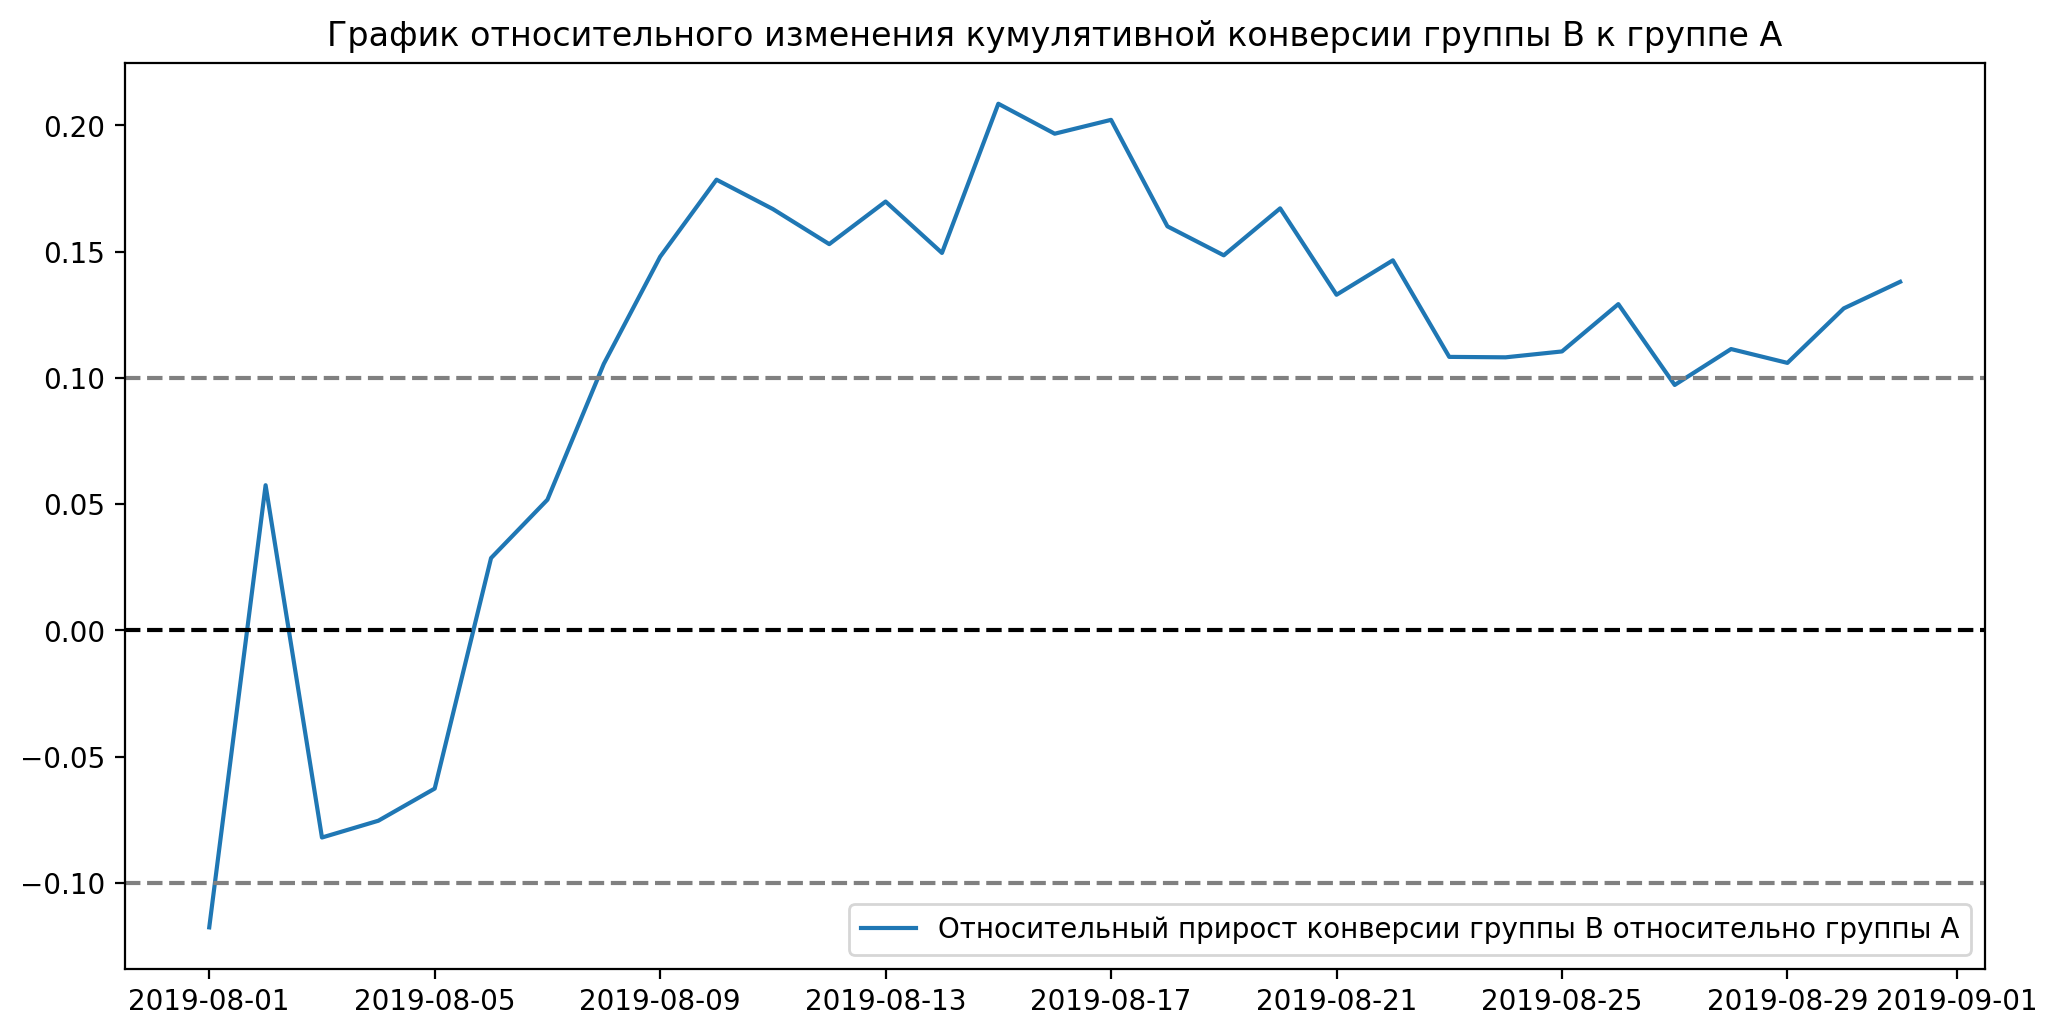

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')


#### Вывод
В начале теста группа B значительно проигрывала группе A, затем по конверсии вырвалась вперёд. Видим, что к концу эксперимента конверсия группы B приросла на 10% относительно группы A.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [24]:
orders.head()
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).\
groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['userId','orders']

Text(0, 0.5, 'Количество заказов')

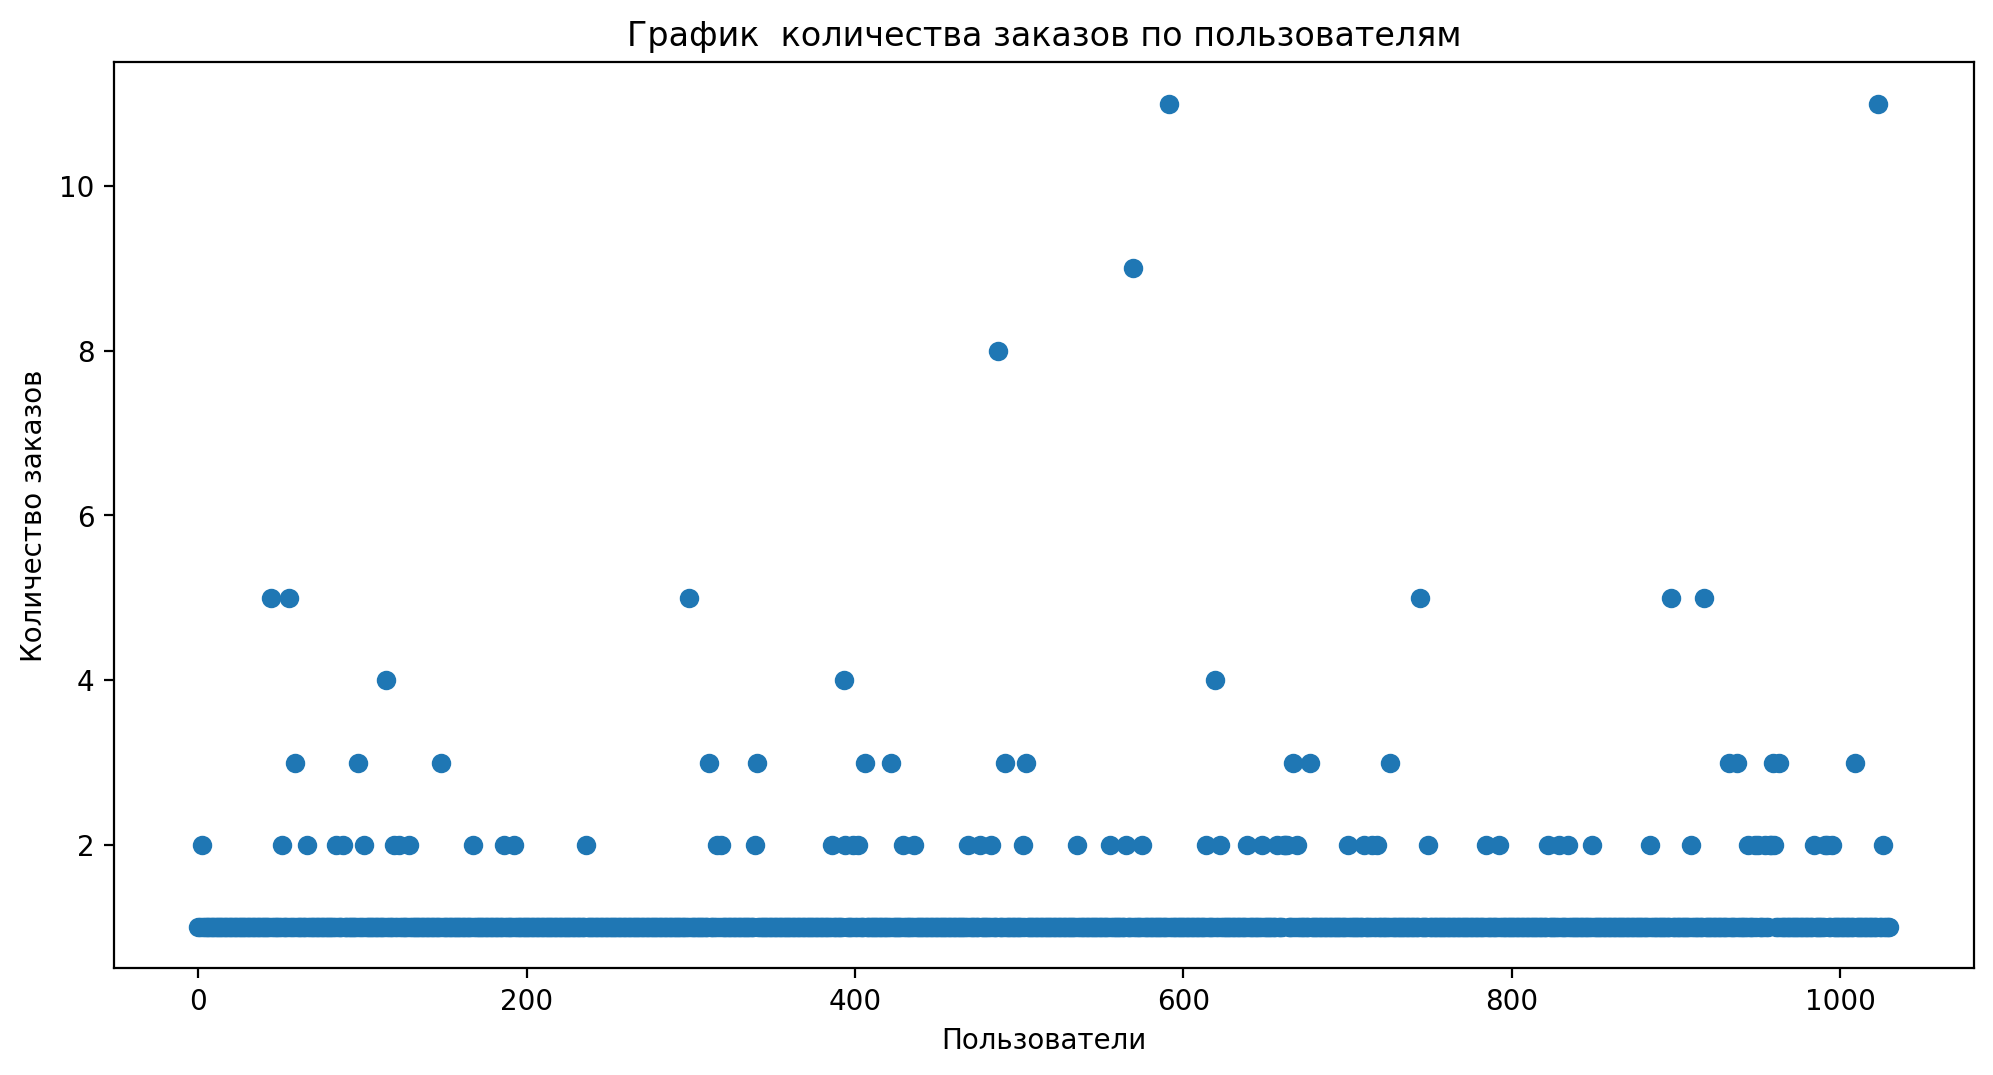

In [25]:
plt.figure(figsize=(12, 6), dpi=200)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График  количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

#### Вывод
Большинство пользователей сделали по 1 заказу. Пользователей, которые сделали больше двух заказов не так много. 

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Вывод
Пользователей, совершавших более 2х заказов, не более 5%. Также не более 1% пользователей совершали больше 4 заказов. Примем пользователей, которые соверашали 2 заказа за нижнюю границу и отсеим аномальных пользователей по ней.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Text(0, 0.5, 'Стоимость')

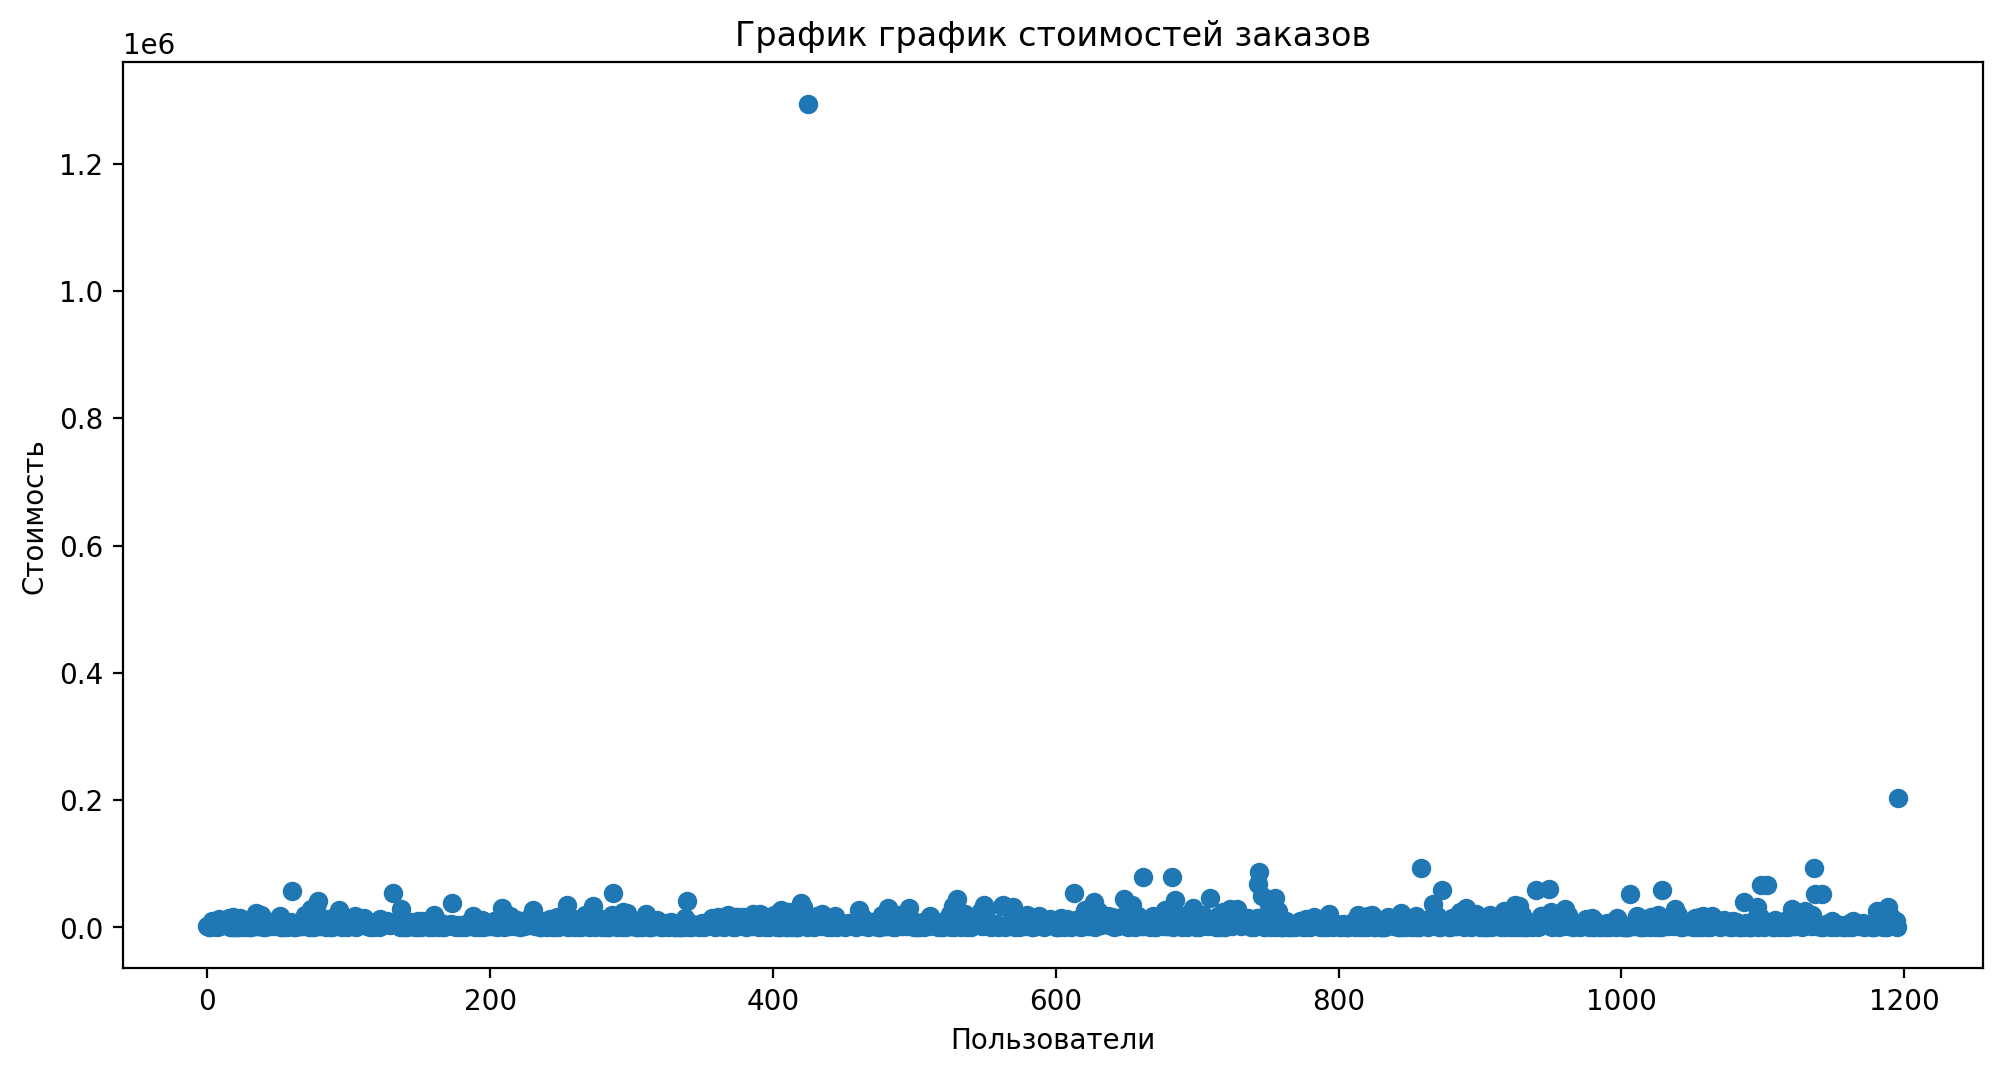

In [27]:
plt.figure(figsize=(12, 6), dpi=200)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')

#### Вывод
В большинстве случаев стоимость заказов не превышает 100000

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### Вывод
Не более 5% заказов дороже 28000 и не более 1% дороже 58233.2 рублей. Выберем нижней границей заказы в 28000, а суммы более будем считать аномальными

#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [29]:
# Объединим в датафрейм кумулятивные значения групп по дате
mergedCumulativeData = cumulativeDataA[['date','orders','revenue', 'visitors']]\
.merge(cumulativeDataB[['date','orders','revenue', 'visitors']], left_on='date', right_on='date', how='left', suffixes=['CummulativeA', 'CummulativeB'])

In [30]:
# Выделим количество заказов, выручку, количество пользователей по группам
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [31]:
# Объединим в одну таблицу
data = mergedCumulativeData.merge(visitorsADaily, left_on='date', right_on='date', how='left')\
.merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
.merge(ordersADaily, left_on='date', right_on='date', how='left')\
.merge(ordersBDaily, left_on='date', right_on='date', how='left')

In [32]:
display(data.head())

,date,ordersCummulativeA,revenueCummulativeA,visitorsCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsCummulativeB,visitorsPerDateA,visitorsPerDateB,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB
0,2019-08-01,24,148579,719,21,101217,713,719,713,24,148579,21,101217
1,2019-08-02,44,242401,1338,45,266748,1294,619,581,20,93822,24,165531
2,2019-08-03,68,354874,1845,61,380996,1803,507,509,24,112473,16,114248
3,2019-08-04,84,425699,2562,78,489567,2573,717,770,16,70825,17,108571
4,2019-08-05,109,549917,3318,101,581995,3280,756,707,25,124218,23,92428


In [33]:
ordersByUsersA  = orders[orders['group']=='A'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
.agg({'transactionId' : 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

In [34]:
# Создадим переменные sampleA и sampleB

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [35]:
# Посчитаем статистическую значимость различия конверсии
print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительная разница конверсии: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value: 0.00840
Относительная разница конверсии: 0.138


#### Вывод
P-value = 0.008, что значительно меньше 0.5. Это значит, что мы отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Различия есть, причем по "сырым" данным относительный прирост конверсии группы B к конверсии группы А составляет 13.8%

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [36]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительная разница среднего чека: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.365
Относительная разница среднего чека: 0.259


#### Вывод
P-value: 0.365, что больше 0.05. Это значит, что статистической разницы между средними чеками между группами нет. Средний чек группы B выше группы А на 25.9%

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [37]:
# Выделим аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], 
                          axis = 0).drop_duplicates().sort_values()


In [38]:
# Подготовим количество заказов по группам
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [39]:
# Применим статистический критерий Манна-Уитни
print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительная разница конверсии: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


P-value: 0.00652
Относительная разница конверсии: 0.173


#### Вывод
P-value = 0.00652, что значительно меньше 0.5. Как и в случае с "сырыми" данными мы отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Различия увеличилось,прирост конверсии группы B к конверсии группы А составляет 17.3%

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [40]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительная разница среднего чека: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))



P-value: 0.369
Относительная разница среднего чека: -0.020


#### Вывод
P-value немного увеличился. Статистической разницы между средними чеками между группами нет. Разница между сегментами сократилась с 25.9% до -2%.

#### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [41]:
orders_new = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]
ordersAggregated_new = datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date']<= x['date'],orders_new['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique\
                                           , 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated_new.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,16,15,54351
66,2019-08-01,B,19,19,78258
175,2019-08-02,A,35,33,146483
173,2019-08-02,B,40,39,171492
291,2019-08-03,A,59,57,258956


In [42]:
cumulativeData_new = ordersAggregated_new.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData_new.head(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,16,15,54351,719
1,2019-08-01,B,19,19,78258,713
2,2019-08-02,A,35,33,146483,1338
3,2019-08-02,B,40,39,171492,1294
4,2019-08-03,A,59,57,258956,1845
5,2019-08-03,B,56,55,285740,1803
6,2019-08-04,A,72,70,325371,2562
7,2019-08-04,B,71,69,360161,2573
8,2019-08-05,A,97,93,449589,3318
9,2019-08-05,B,92,90,421819,3280


In [43]:
cumulativeRevenueA_new = cumulativeData_new[cumulativeData_new['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_new = cumulativeData_new[cumulativeData_new['group']=='B'][['date','revenue', 'orders']]

In [44]:
mergedCumulativeRevenue_new = cumulativeRevenueA_new.merge(cumulativeRevenueB_new, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

Text(0, 0.5, 'Отношение средних чеков')

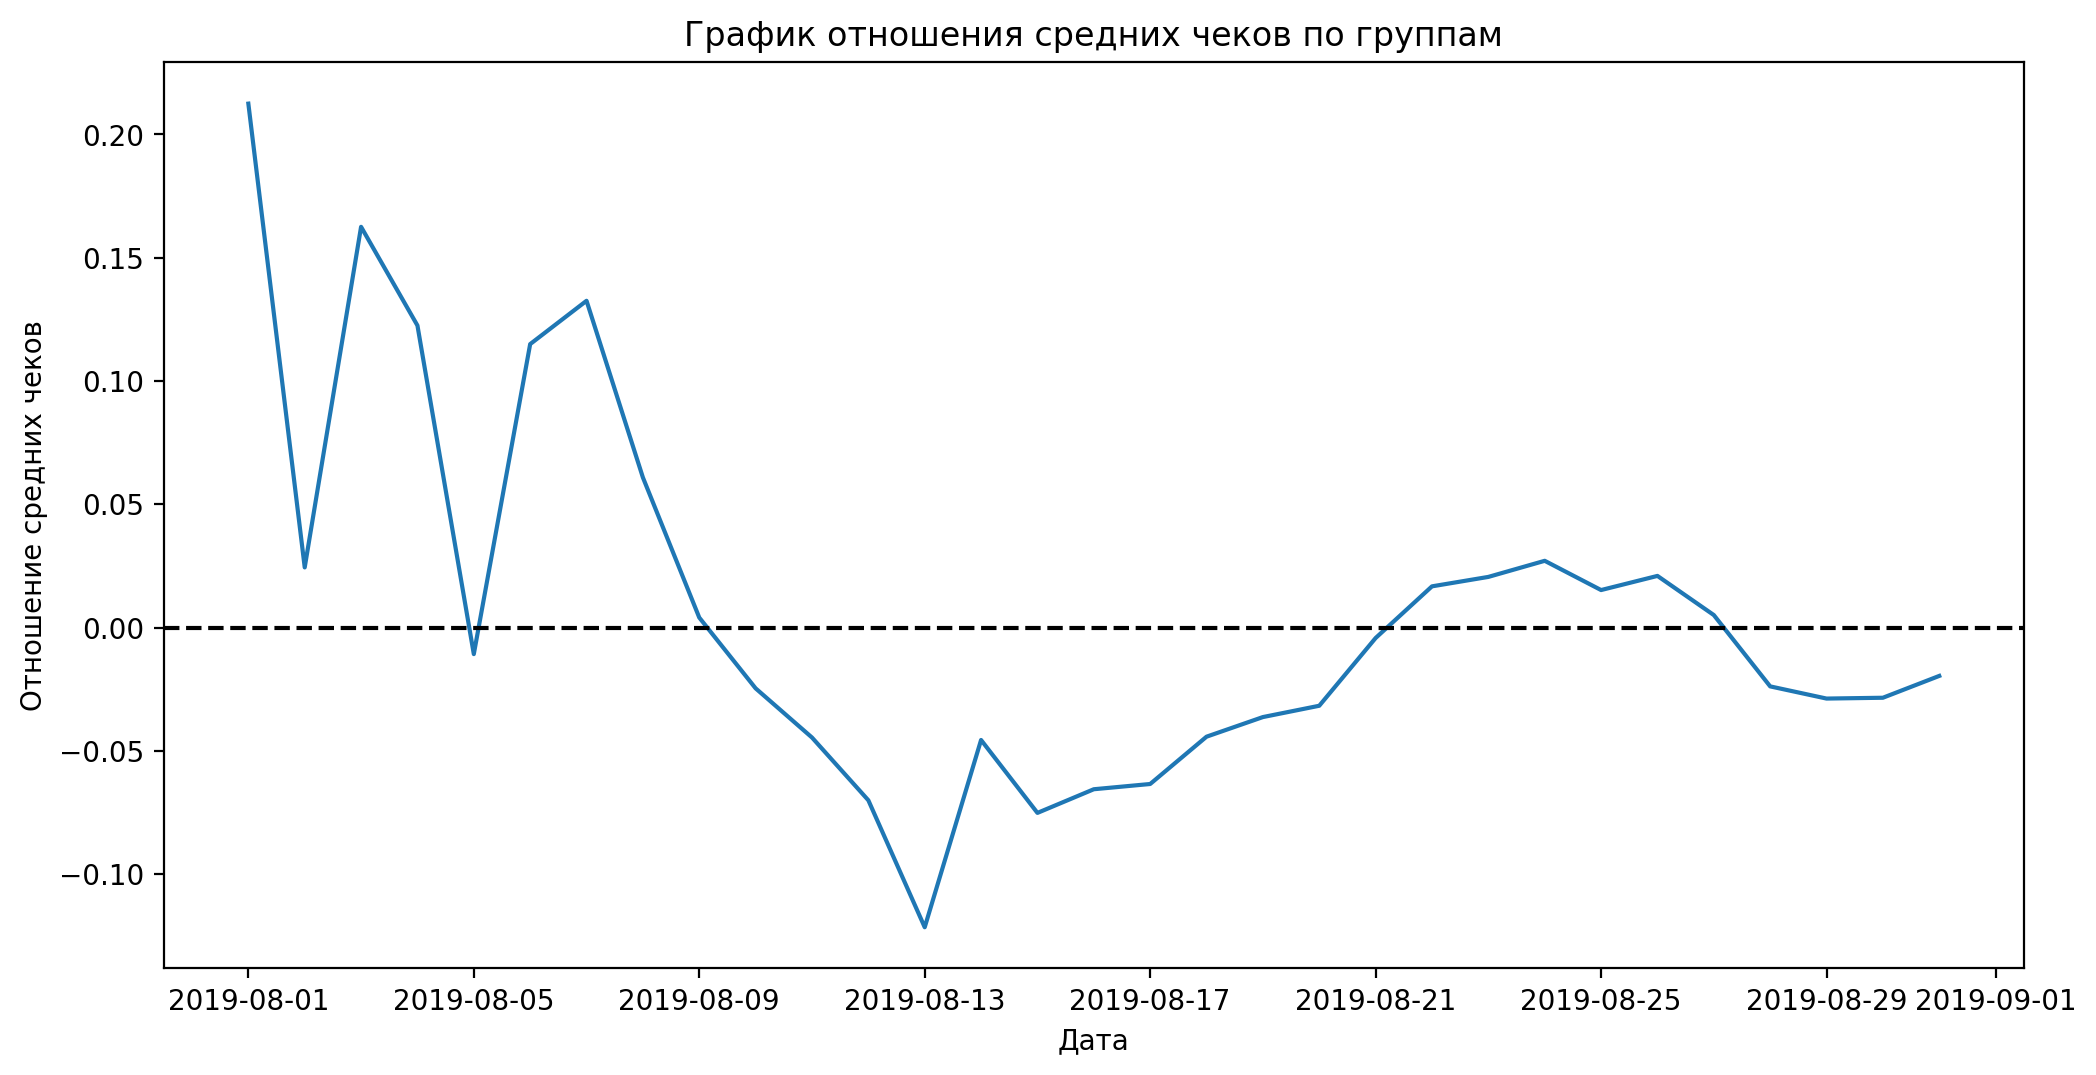

In [45]:
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(mergedCumulativeRevenue_new['date'], (mergedCumulativeRevenue_new['revenueB']/mergedCumulativeRevenue_new['ordersB'])/(mergedCumulativeRevenue_new['revenueA']/mergedCumulativeRevenue_new['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График отношения средних чеков по группам')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')

In [46]:
cumulativeData_new['conversion'] = cumulativeData_new['orders']/cumulativeData_new['visitors']
# отделяем данные по группе A
cumulativeDataA_new = cumulativeData_new[cumulativeData_new['group']=='A']

# отделяем данные по группе B
cumulativeDataB_new = cumulativeData_new[cumulativeData_new['group']=='B']

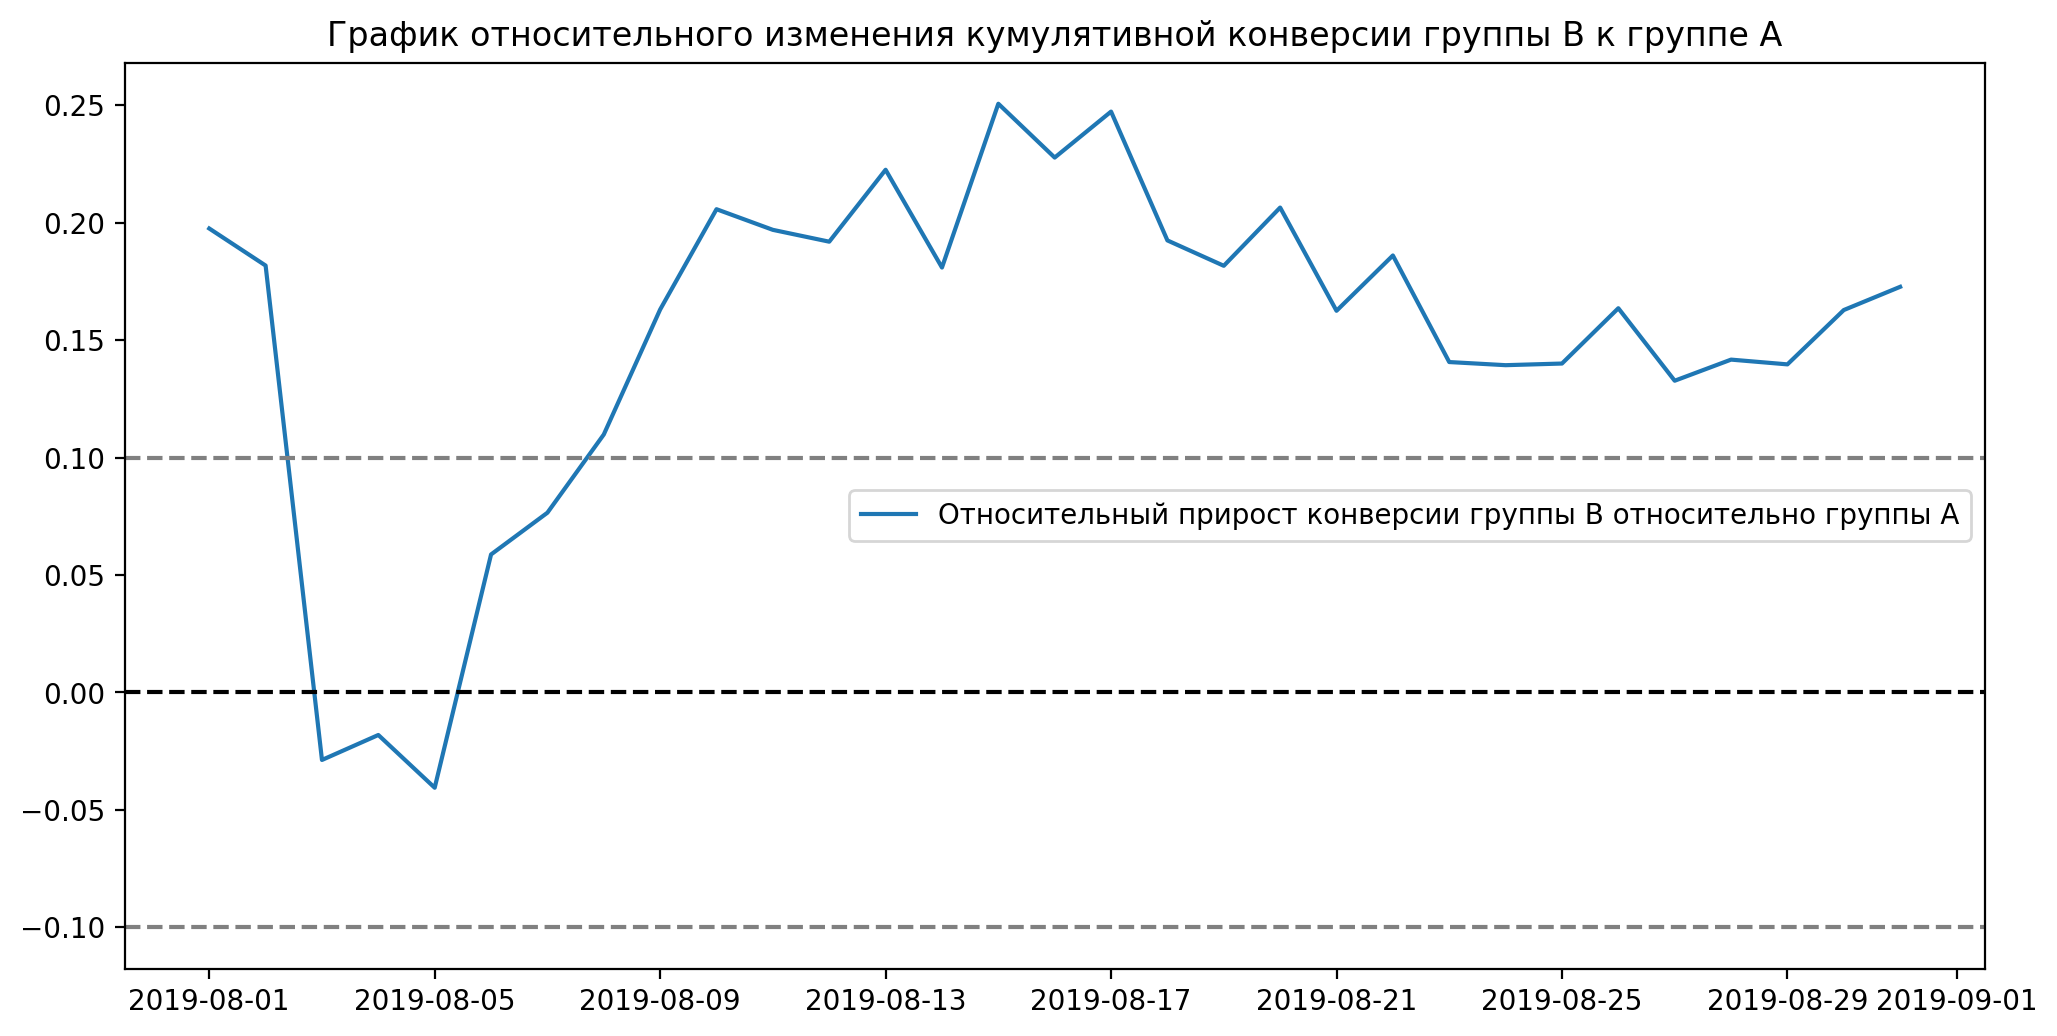

In [47]:
mergedCumulativeConversions_new = cumulativeDataA_new[['date','conversion']].merge(cumulativeDataB_new[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(mergedCumulativeConversions_new['date'], mergedCumulativeConversions_new['conversionB']/mergedCumulativeConversions_new['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

#### Вывод
Полученные данные:

- Есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий;

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, различие составляет - 17.3%;

- График различия среднего чека говорит о том, что результаты группы B стали чуточку хуже (-2%) и нет значительной тенденции к улучшению.

Эксперимент следует остановить и считать его успешным, так как конверсия выросла. Группа В статистически лучше группы А. График говорит о фиксации результата.